In [1]:
# 导入相关库
import numpy as np
import random as rnd
import pandas as pd

import pylab
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math as mt
from math import sqrt
import os
import re
import warnings
import category_encoders as ce
warnings.filterwarnings('ignore')

from scipy.optimize import curve_fit #曲线拟合
from collections import Counter # 计数器
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,make_scorer,accuracy_score

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# 机器学习模型
from sklearn.linear_model import LogisticRegression # 逻辑回归模型
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC,LinearSVC # 线性分类支持向量机
from sklearn.ensemble import RandomForestClassifier # 随机森林分类模型
from sklearn.neighbors import KNeighborsClassifier # K近邻分类模型
from sklearn.naive_bayes import GaussianNB # 贝叶斯分类模型
from sklearn.linear_model import Perceptron # 感知机模型
from sklearn.linear_model import SGDClassifier # 梯度下降算法
from sklearn.tree import DecisionTreeClassifier # 决策树模型
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from sklearn.decomposition import PCA


In [2]:
# 加载数据集
data = pd.read_csv('data0.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         359 non-null    object
 1   Contest number               359 non-null    int64 
 2   Word                         359 non-null    object
 3   Number of  reported results  359 non-null    int64 
 4   Number in hard mode          359 non-null    int64 
 5   1 try                        359 non-null    int64 
 6   2 tries                      359 non-null    int64 
 7   3 tries                      359 non-null    int64 
 8   4 tries                      359 non-null    int64 
 9   5 tries                      359 non-null    int64 
 10  6 tries                      359 non-null    int64 
 11  7 or more tries (X)          359 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 33.8+ KB
None


In [3]:
# 预览数据集
data.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,12/31/2022,560,manly,20380,1899,0,2,17,37,29,12,2
1,12/30/2022,559,molar,21204,1973,0,4,21,38,26,9,1
2,12/29/2022,558,havoc,20001,1919,0,2,16,38,30,12,2
3,12/28/2022,557,impel,20160,1937,0,3,21,40,25,9,1
4,12/27/2022,556,condo,20879,2012,0,2,17,35,29,14,3


In [4]:
# 查看数值类(int,float)特征的数据分布情况
data.describe()

,Contest number,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,381.000000,90918.877437,5098.350975,0.470752,5.844011,22.727019,32.927577,23.637883,11.559889,2.805014
std,103.778611,89274.374730,3166.612389,0.782923,4.076525,7.781092,5.353983,5.946908,6.207416,4.121869
min,202.000000,2569.000000,1362.000000,0.000000,0.000000,4.000000,11.000000,9.000000,2.000000,0.000000
25%,291.500000,30308.500000,2848.500000,0.000000,3.000000,17.000000,30.000000,19.000000,7.000000,1.000000
50%,381.000000,44578.000000,3548.000000,0.000000,5.000000,23.000000,34.000000,24.000000,10.000000,2.000000
75%,470.500000,120294.000000,7004.500000,1.000000,7.000000,29.000000,36.000000,28.000000,15.000000,3.000000
max,560.000000,361908.000000,15369.000000,6.000000,26.000000,47.000000,49.000000,44.000000,37.000000,48.000000


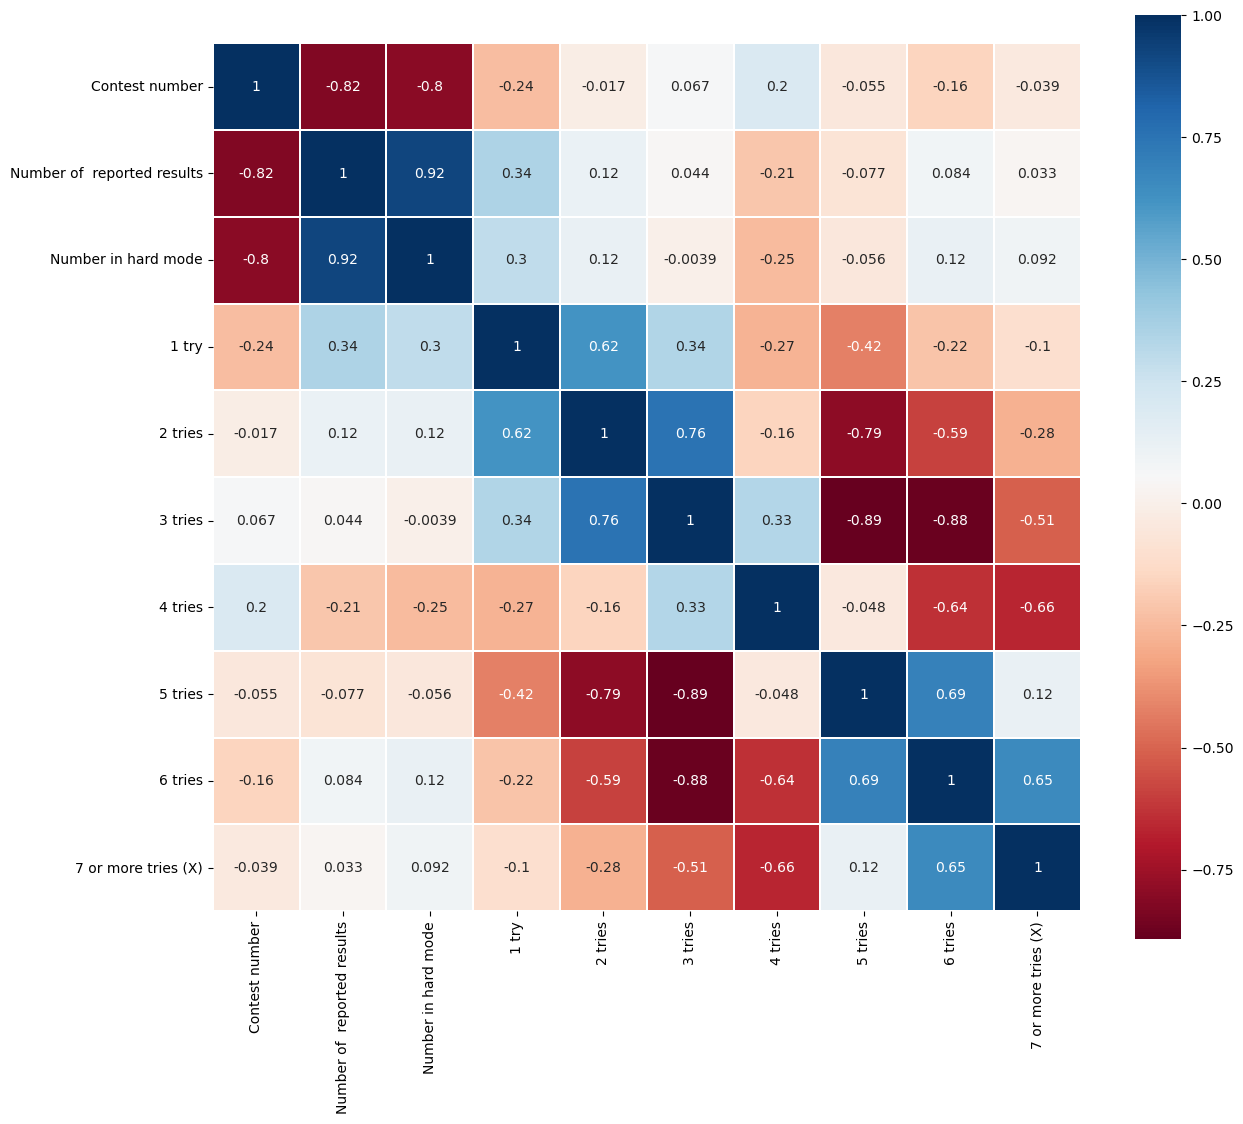

In [5]:
# 用seaborn的heatmap对特征之间的相关性进行可视化
df = pd.DataFrame(data)
df = df.drop(['Word','Date'],axis=1)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,cmap=colormap,linecolor='white',annot=True)
plt.show()

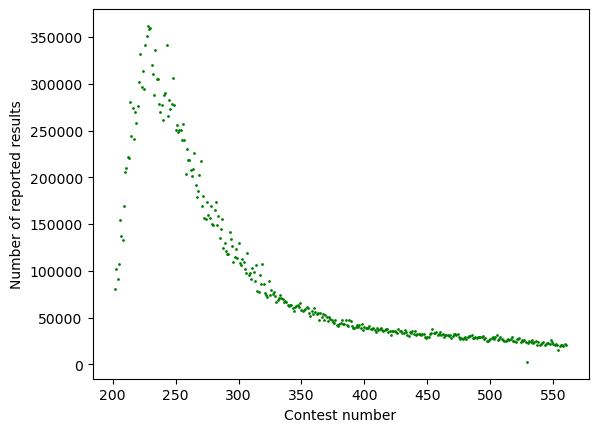

In [6]:
plt.scatter(data['Contest number'],data['Number of  reported results'],s=1,color='green')
plt.xlabel('Contest number')
plt.ylabel('Number of reported results')
plt.show()

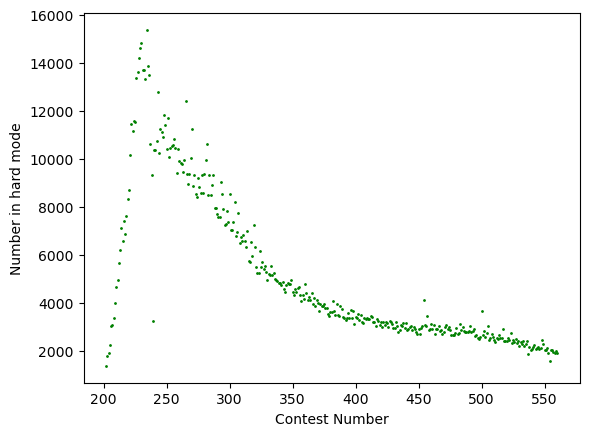

In [7]:
plt.scatter(data['Contest number'],data['Number in hard mode'],s=1,color='green')
plt.xlabel('Contest Number')
plt.ylabel('Number in hard mode')
plt.show()

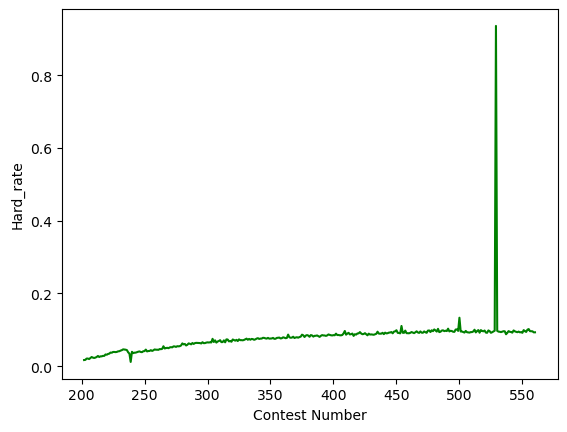

In [8]:
# 新增列
data['under_2'] = data['1 try'] + data['2 tries']
data['under_3'] = data['under_2'] + data['3 tries']
data['under_4'] = data['under_3'] + data['4 tries']
data['under_5'] = data['under_4'] + data['5 tries']
data['under_6'] = data['under_5'] + data['6 tries']
data['Overall'] = data['under_6'] + data['7 or more tries (X)']
data['D'] = data['1 try']*0.01 + data['2 tries']*0.02 + data['3 tries']*0.03 + data['4 tries']*0.04 +data['5 tries']*0.05 + data['6 tries']*0.06 + data['7 or more tries (X)']*0.07


# 建立时间与Hard_rate的关系图
Hard_rate = data['Number in hard mode']/data['Number of  reported results']
data['Hard_rate'] = Hard_rate#添加一列为选择hard的玩家占比
plt.plot(data['Contest number'],Hard_rate,color='green')
plt.xlabel('Contest Number')
plt.ylabel('Hard_rate')
plt.show()
# 可以看出随着时间推移，选择困难的人数比率有轻微上升趋势

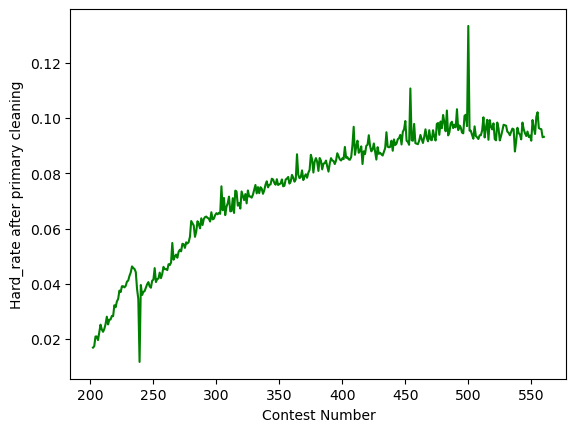

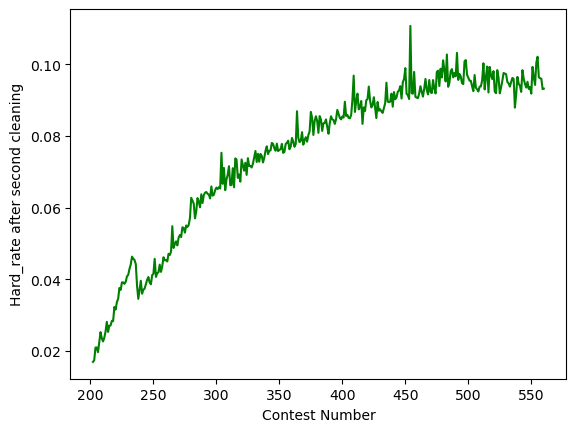

In [9]:
# 清洗不合法的数据后再看效果
data = data.drop(data[(97.5>data['Overall'])|(data['Overall']>102.5)].index,axis=0)
data = data.drop(data[(data['Hard_rate']>0.8)].index,axis=0)

plt.plot(data['Contest number'],data['Hard_rate'],color='green')
plt.xlabel('Contest Number')
plt.ylabel('Hard_rate after primary cleaning')
plt.show()

# 进一步清洗
data = data.drop(data[(data['Hard_rate']>0.112) | (data['Hard_rate']<0.012)].index,axis=0)
plt.plot(data['Contest number'],data['Hard_rate'],color='green')
plt.xlabel('Contest Number')
plt.ylabel('Hard_rate after second cleaning')
plt.show()

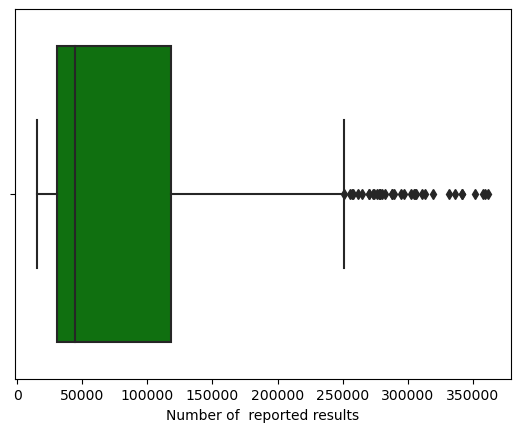

In [10]:
# 利用箱型图的四分位距（IQR）对异常值进行检测并处理异常值
sns.boxplot(data['Number of  reported results'],color='green')
q1 = data['Number of  reported results'] .quantile(0.25)
q3 = data['Number of  reported results'] .quantile(0.75)
IQR =q3 - q1
UpLimit =q3 + IQR * 1.5
DownLimit = q1 - IQR * 1.5
lst = 0
new_results = []
for i in data['Number of  reported results']:
    if i > UpLimit or i < DownLimit:
        new_results.append(lst)
    else:
        new_results.append(i)
    lst = i

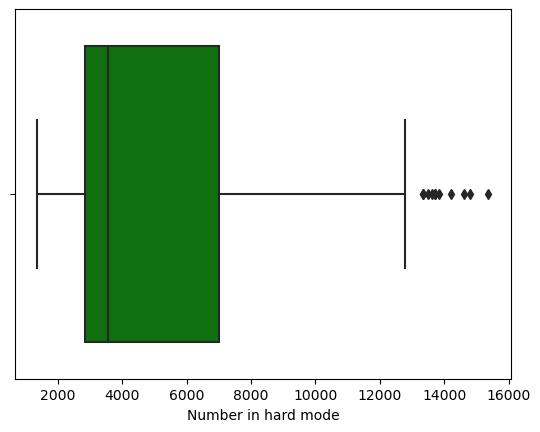

In [11]:
sns.boxplot(data['Number in hard mode'],color='green')
q1 = data['Number in hard mode'] .quantile(0.25)
q3 = data['Number in hard mode'] .quantile(0.75)
IQR =q3 - q1
UpLimit =q3 + IQR * 1.5
DownLimit = q1 - IQR * 1.5
lst = 0
new_hard = []
for i in data['Number in hard mode']:
    if i > UpLimit or i < DownLimit:
        new_hard.append(lst)
    else:
        new_hard.append(i)
    lst = i

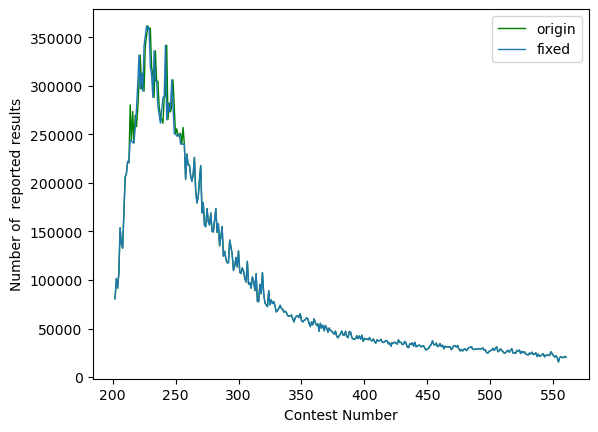

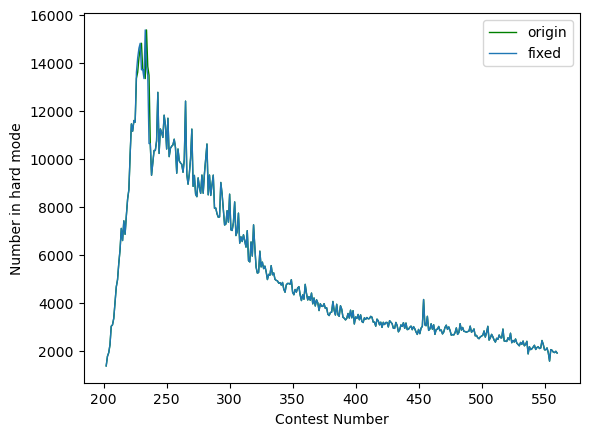

In [12]:
plt.plot(data['Contest number'],data['Number of  reported results'],color='green',linewidth=1)
plt.plot(data['Contest number'],new_results,linewidth=1)
plt.xlabel('Contest Number')
plt.ylabel('Number of  reported results')
plt.legend(['origin','fixed'])
plt.show()

plt.plot(data['Contest number'],data['Number in hard mode'],color='green',linewidth=1)
plt.plot(data['Contest number'],new_hard,linewidth=1)
plt.xlabel('Contest Number')
plt.ylabel('Number in hard mode')
plt.legend(['origin','fixed'])
plt.show()

data['Number of  reported results'] = new_results
data['Number in hard mode'] = new_hard

In [13]:
 # 保存为数据集1
data = data.sort_values(['Contest number'], ascending=True)
data.to_csv('data1.csv',index=False)
data.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),under_2,under_3,under_4,under_5,under_6,Overall,D,Hard_rate
358,1/7/2022,202,slump,80630,1362,1,3,23,39,24,9,1,4,27,66,90,99,100,4.13,0.016892
357,1/8/2022,203,crank,101503,1763,1,5,23,31,24,14,2,6,29,60,84,98,100,4.22,0.017369
356,1/9/2022,204,gorge,91477,1913,1,3,13,27,30,22,4,4,17,44,74,96,100,4.64,0.020912
355,1/10/2022,205,query,107134,2242,1,4,16,30,30,17,2,5,21,51,81,98,100,4.43,0.020927
354,1/11/2022,206,drink,153880,3017,1,9,35,34,16,5,1,10,45,79,95,100,101,3.77,0.019606


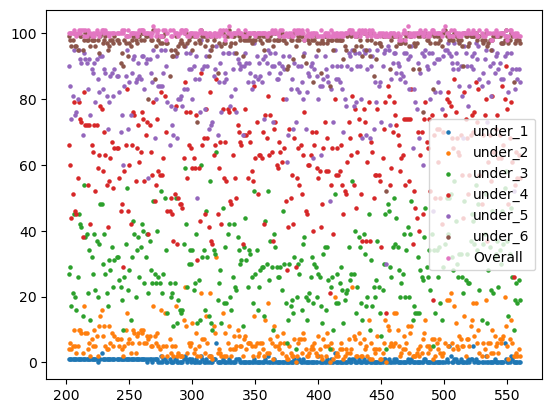

In [14]:
# 查看随着时间变化，尝试次数区间分布的变化

x = data['Contest number']
plt.scatter(x,data['1 try'],s=5)
plt.scatter(x,data['under_2'],s=5)
plt.scatter(x,data['under_3'],s=5)
plt.scatter(x,data['under_4'],s=5)
plt.scatter(x,data['under_5'],s=5)
plt.scatter(x,data['under_6'],s=5)
plt.scatter(x,data['Overall'],s=5)
plt.legend(['under_1','under_2','under_3','under_4','under_5','under_6','Overall'])
plt.show()
# 可以看出,虽然选择hard的玩家比例有着轻微的上升趋势，但是尝试次数分布并没有发生太多的变化

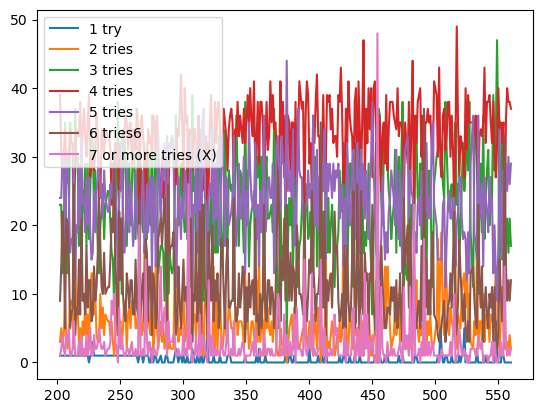

In [15]:
# 查看随着时间变化，尝试次数区间分布的变化

x = data['Contest number']
plt.plot(x,data['1 try'])
plt.plot(x,data['2 tries'])
plt.plot(x,data['3 tries'])
plt.plot(x,data['4 tries'])
plt.plot(x,data['5 tries'])
plt.plot(x,data['6 tries'])
plt.plot(x,data['7 or more tries (X)'])
plt.legend(['1 try','2 tries','3 tries','4 tries','5 tries','6 tries6','7 or more tries (X)'])
plt.show()
# 可以看出,虽然选择hard的玩家比例有着轻微的上升趋势，但是尝试次数分布并没有发生太多的变化

 
-700.3 x + 3.57e+05
       2
3.528 x - 3388 x + 8.312e+05
           3         2
2.826e-05 x + 3.496 x - 3376 x + 8.298e+05
            4          3         2
-0.0002439 x + 0.3718 x - 202.2 x + 4.546e+04 x - 3.354e+06
           5            4         3        2
3.049e-06 x - 0.006052 x + 4.688 x - 1764 x + 3.199e+05 x - 2.208e+07
            6            5           4         3        2
-2.675e-08 x + 6.42e-05 x - 0.06313 x + 32.49 x - 9208 x + 1.358e+06 x - 8.095e+07


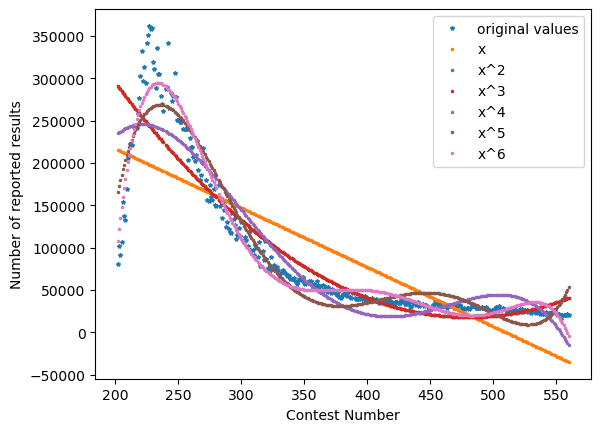

In [16]:
x, y = data['Contest number'],data['Number of  reported results']
# 曲线拟合，返回值为多项式的各项系数
p1 = np.poly1d(np.polyfit(x, y, 1))
p2 = np.poly1d(np.polyfit(x, y, 2))
p3 = np.poly1d(np.polyfit(x, y, 3))
p4 = np.poly1d(np.polyfit(x, y, 4))
p5 = np.poly1d(np.polyfit(x, y, 5))
p6 = np.poly1d(np.polyfit(x, y, 6))

print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)

y1 = p1(x)
y2 = p2(x)
y3 = p3(x)
y4 = p4(x)
y5 = p5(x)
y6 = p6(x)

plot0 = plt.plot(x, y, '*',ms=3)
plot1 = plt.plot(x, y1, '.',ms=3)
plot2 = plt.plot(x, y2, '.',ms=3)
plot3 = plt.plot(x, y3, '.',ms=3)
plot4 = plt.plot(x, y4, '.',ms=3)
plot5 = plt.plot(x, y5, '.',ms=3)
plot6 = plt.plot(x, y6, '.',ms=3)
plt.xlabel('Contest Number')
plt.ylabel('Number of reported results')
plt.legend(['original values','x','x^2','x^3','x^4','x^5','x^6'])
plt.show()  
# 我们发现多项式函数并不能很好地拟合Number of  reported results,于是在接下来考虑非线性的值

{'a': {'value': 0.009444474736110625, 'desc': '发展灰数'}, 'b': {'value': 312202.8319459979, 'desc': '控制灰数'}, 'predict': {'value': array([10947.90788174, 10844.99737513, 10743.0542289 , 10642.06934986,
       10542.03373026, 10442.93844707, 10344.7746611 , 10247.53361627,
       10151.20663879, 10055.78513642,  9961.26059767,  9867.62459108,
        9774.86876442,  9682.984844  ,  9591.96463388,  9501.80001516,
        9412.48294528,  9324.00545727,  9236.35965904,  9149.53773269,
        9063.53193382,  8978.33459081,  8893.93810418,  8810.33494584,
        8727.51765851,  8645.47885499,  8564.21121751,  8483.70749711,
        8403.96051294,  8324.96315169,  8246.70836687,  8169.18917827,
        8092.39867126,  8016.32999622,  7940.97636793,  7866.33106493,
        7792.38742896,  7719.13886433,  7646.57883736,  7574.70087579,
        7503.4985682 ,  7432.96556341,  7363.09556998,  7293.88235559,
        7225.31974651,  7157.40162703,  7090.12193894,  7023.47468099,
        6957.45390831

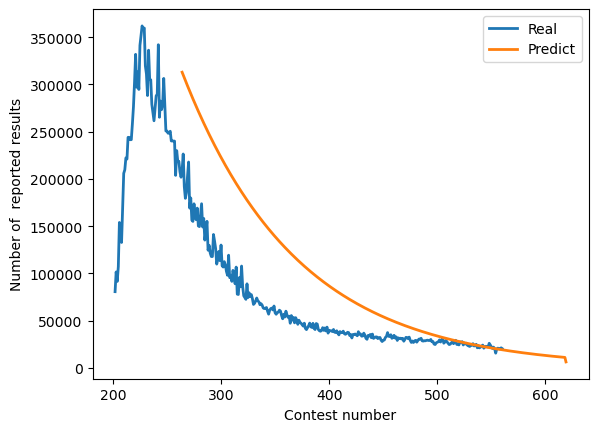

In [17]:
# 灰色预测模型 参考https://blog.csdn.net/weixin_53597801/article/details/121879893
data = pd.read_csv('data1.csv')
list1 = np.array(data['Number of  reported results'])
tlist1 = np.array(data['Contest number'])
fy = []

def GM11(x,n):
    '''
    灰色预测
    x：序列，numpy对象
    n:需要往后预测的个数
    '''
    x1 = x.cumsum()#一次累加  
    z1 = (x1[:len(x1) - 1] + x1[1:])/2.0#紧邻均值  
    z1 = z1.reshape((len(z1),1))  
    B = np.append(-z1,np.ones_like(z1),axis=1)  
    Y = x[1:].reshape((len(x) - 1,1))
    #a为发展系数 b为灰色作用量
    [[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Y)#计算待估参数  
    result = (x[0]-b/a)*np.exp(-a*(n-1))-(x[0]-b/a)*np.exp(-a*(n-2))  #预测方程
    S1_2 = x.var() #原序列方差
    e = list() #残差序列
    for index in range(1,x.shape[0]+1):
        predict = (x[0]-b/a)*np.exp(-a*(index-1))-(x[0]-b/a)*np.exp(-a*(index-2))
        e.append(x[index-1]-predict)
        #print(predict)    #预测值
        fy.append(predict)
    #print("后验差检验")
    S2_2 = np.array(e).var()#残差方差
    C = S2_2/S1_2 #后验差比
    if C<=0.35:
        assess = '后验差比<=0.35，模型精度等级为好'
    elif C<=0.5:
        assess = '后验差比<=0.5，模型精度等级为合格'
    elif C<=0.65:
        assess = '后验差比<=0.65，模型精度等级为勉强'
    else:
        assess = '后验差比>0.65，模型精度等级为不合格'
    #预测数据
    predict = list()
    for index in range(x.shape[0]+1,x.shape[0]+n+1):
        predict.append((x[0]-b/a)*np.exp(-a*(index-1))-(x[0]-b/a)*np.exp(-a*(index-2)))
    predict = np.array(predict)
 
    return {
            'a':{'value':a,'desc':'发展灰数'},
            'b':{'value':b,'desc':'控制灰数'},
            'predict':{'value':result,'desc':'第%d个预测值'%n},
            'C':{'value':C,'desc':assess},
            'predict':{'value':predict,'desc':'往后预测%d个的序列'%(n)},
            }
    

data = np.array(list1)
result = GM11(data,60)
predict = result['predict']['value']
predict = np.round(predict,1)
print(result)
 
print("残差检验")
a = []
for i in range(5):
    a.append(abs(fy[i]-list1[i]))
    print('%.5f%%' % ((abs(fy[i]-list1[i]))/list1[i]))
print("关联度检验")
c= []
for i in range(5):
    b = (min(a)+0.5*max(a))/(abs(a[i])+0.5*max(a))
    c.append(b)
print("ρ = 0.5 关联度为：",np.mean(c))
print(predict)
fy.append(6276)

#作图
x1 = np.array(tlist1)  # 原来是202-560
y1 = np.array(list1)
x2 = np.arange(264,620,1) # 要预测到262-620
y2 = np.array(fy)
 
plt.plot(x1,y1,label='Real',linewidth=2)   #真实值
plt.plot(x2,y2,label='Predict',linewidth=2)   #预测值
plt.xlabel('Contest number')
plt.ylabel('Number of  reported results')
plt.legend()
plt.plot()
plt.show()


# LSTM 模型预测时间序列

Epoch 1/5
130/130 - 6s - loss: 0.0028 - 6s/epoch - 50ms/step
Epoch 2/5
130/130 - 3s - loss: 7.3697e-04 - 3s/epoch - 23ms/step
Epoch 3/5
130/130 - 2s - loss: 6.0285e-04 - 2s/epoch - 16ms/step
Epoch 4/5
130/130 - 2s - loss: 0.0013 - 2s/epoch - 16ms/step
Epoch 5/5
130/130 - 2s - loss: 7.5203e-04 - 2s/epoch - 16ms/step
3/3 [==============================] - 1s 12ms/step


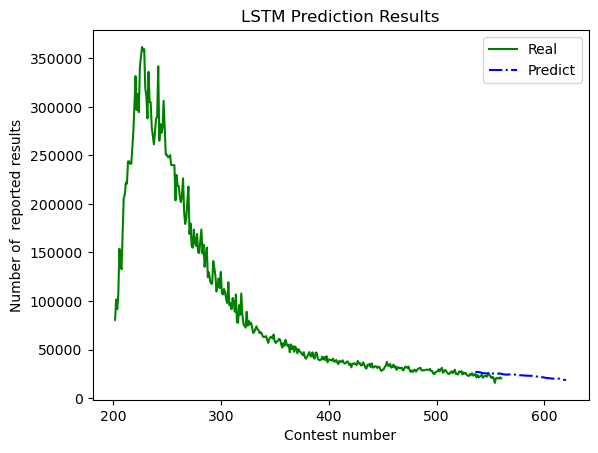

[[26866.71 ]
 [26887.727]
 [26831.287]
 [26654.244]
 [26451.285]
 [26187.645]
 [25949.307]
 [25756.846]
 [25539.273]
 [25370.23 ]
 [25290.693]
 [25277.625]
 [25337.592]
 [25357.271]
 [25339.068]
 [25309.068]
 [25268.33 ]
 [25236.406]
 [25218.074]
 [25198.77 ]
 [25179.797]
 [25198.475]
 [25160.99 ]
 [25096.55 ]
 [24925.26 ]
 [24671.836]
 [24432.51 ]
 [24251.102]
 [24179.184]
 [24112.086]
 [24131.236]
 [24252.367]
 [24274.24 ]
 [24264.379]
 [24291.03 ]
 [24291.064]
 [24224.188]
 [24070.074]
 [23876.32 ]
 [23710.941]
 [23602.705]
 [23475.62 ]
 [23403.51 ]
 [23429.523]
 [23374.684]
 [23275.014]
 [23125.133]
 [23050.549]
 [23004.787]
 [23015.223]
 [22948.072]
 [22902.686]
 [22834.941]
 [22782.482]
 [22666.26 ]
 [22474.51 ]
 [22305.135]
 [22132.318]
 [22020.488]
 [21875.236]
 [21724.977]
 [21623.115]
 [21436.693]
 [21280.344]
 [21068.986]
 [20854.531]
 [20677.006]
 [20572.434]
 [20414.426]
 [20270.79 ]
 [20164.924]
 [20072.184]
 [19986.584]
 [20035.719]
 [20113.553]
 [20143.61 ]
 [20083.885]

In [21]:
pre_data = pd.read_csv('data1.csv')
data = np.array(pre_data['Number of  reported results'])

train_data = data[:200]
test_data = data[200:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

x_train, y_train = [], []
for i in range(70, len(train_data)):
    x_train.append(scaled_data[i-70:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

#model.fit(x_train, y_train, epochs=3, batch_size=1, verbose=2)
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)

test_data = scaler.transform(test_data.reshape(-1, 1))
test_x, test_y = [], []
for i in range(70, len(test_data)):
    test_x.append(test_data[i-70:i, 0])
    test_y.append(test_data[i, 0])
test_x, test_y = np.array(test_x), np.array(test_y)

test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

predictions = model.predict(test_x)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.plot(pre_data['Contest number'],pre_data['Number of  reported results'], color = 'green', label = 'Real')
plt.plot(range(536, 621),predictions, color = 'blue', label = 'Predict',linestyle='-.')
plt.title('LSTM Prediction Results')
plt.xlabel('Contest number')
plt.ylabel('Number of  reported results')
plt.legend()
plt.show()

print(predictions)

In [22]:
# 针对Word建立数据集
# 难度系数=尝试次数的期望
# 考虑的因素主要有：Contest Number ,每个位置上的
pre_data = pd.read_csv('data1.csv')
new_data = pre_data

multiplicity = []
letter0 = []
letter1 = []
letter2 = []
letter3 = []
letter4 = []
vowel_num = []
vowel_pos = []

sum_letter_frequency = []
first_letter_frequency = []
sum_bigrams_frequency = []

#mmp = {'z': 1, 'q': 2, 'x': 3, 'j': 4, 'k': 5, 'v': 6, 'b': 7, 'p': 8, 'y': 9, 'g': 10, 'f': 11, 'w': 12, 'm': 13, 'u': 14, 'c': 15, 'l': 16, 'd': 17, 'r': 18, 'h': 19, 's': 20, 'n': 21, 'i': 22, 'o': 23, 'a': 24, 't': 25, 'e': 26}
valid_solutions_letter_frequency = {'e': 1233, 'a': 979, 'r': 899, 'o': 754, 't': 729, 'l': 719, 'i': 671, 's': 669, 'n': 575, 'c': 477, 'u': 467, 'y': 425, 'd': 393, 'h': 389, 'p': 367, 'm': 316, 'g': 311, 'b': 281, 'f': 230, 'k': 210, 'w': 195, 'v': 153, 'z': 40, 'x': 37, 'q': 29, 'j': 27}
valid_guesses_letter_frequency = {'s': 5996, 'e': 5429, 'a': 5011, 'o': 3684, 'r': 3259, 'i': 3088, 'l': 2652, 't': 2566, 'n': 2377, 'd': 2060, 'u': 2044, 'm': 1660, 'p': 1652, 'y': 1649, 'c': 1551, 'h': 1371, 'b': 1346, 'g': 1333, 'k': 1295, 'f': 885, 'w': 844, 'v': 541, 'z': 394, 'j': 264, 'x': 251, 'q': 83}
valid_first_letter_frequency = {'s': 366, 'c': 198, 'b': 173, 't': 149, 'p': 142, 'a': 141, 'f': 136, 'g': 115, 'd': 111, 'm': 107, 'r': 105, 'l': 88, 'w': 83, 'e': 72, 'h': 69, 'v': 43, 'o': 41, 'n': 37, 'i': 34, 'u': 33, 'q': 23, 'j': 20, 'k': 20, 'y': 6, 'z': 3}
bigrams_frequency = {'er': 189, 'in': 129, 'st': 123, 'al': 116, 'ra': 115, 're': 114, 'ar': 107, 'ch': 105, 'ro': 100, 'or': 99, 'le': 94, 'an': 93, 'ea': 89, 'te': 88, 'la': 86, 'sh': 86, 'el': 84, 'ri': 83, 'se': 81, 've': 79, 'un': 79, 'de': 78, 'en': 77, 'lo': 77, 'on': 74, 'as': 71, 'th': 69, 'at': 68, 'ou': 67, 'il': 66, 'ly': 64, 'ne': 63, 'ng': 62, 'ic': 60, 'ee': 59, 'li': 59, 'll': 59, 'ha': 59, 'ta': 59, 'oo': 58, 'pe': 58, 'ma': 57, 'id': 55, 'us': 55, 'cr': 55, 'it': 55, 'ck': 54, 'ge': 54, 'ca': 54, 'to': 53, 'me': 53, 'et': 53, 'ac': 52, 'nt': 52, 'sp': 50, 'ho': 49, 'ad': 49, 'he': 49, 'ty': 49, 'ur': 49, 'ru': 49, 'tr': 48, 'ai': 47, 'co': 46, 'be': 44, 'ut': 44, 'ce': 44, 'ow': 43, 'am': 43, 'ot': 42, 'is': 42, 'lu': 42, 'gr': 41, 'mo': 41, 'pi': 41, 'bl': 40, 'ed': 40, 'ir': 40, 'um': 40, 'dy': 40, 'br': 40, 'bo': 39, 'hi': 39, 'ie': 38, 'ry': 38, 'pa': 38, 'fl': 37, 'rt': 36, 'ss': 36, 'we': 36, 'ba': 35, 'ap': 35, 'ul': 34, 'nd': 34, 'nk': 34, 'na': 34, 'ol': 34, 'cl': 34, 'mi': 32, 'mp': 32, 'no': 32, 'ti': 32, 'po': 32, 'ga': 31, 'ke': 31, 'os': 31, 'sc': 31, 'av': 31, 'ky': 31, 'sl': 30, 'pr': 30, 'sa': 30, 'ak': 30, 'dr': 30, 'ab': 29, 'go': 29, 'ni': 29, 'di': 29, 'qu': 29, 'fi': 28, 'ig': 28, 'pl': 28, 'im': 28, 'ue': 28, 'nc': 28, 'bu': 27, 'vi': 27, 'au': 27, 'wi': 27, 'ov': 26, 'ag': 26, 'ny': 26, 'es': 26, 'fe': 26, 'bi': 25, 'od': 25, 'do': 25, 'gu': 25, 'om': 25, 'wa': 25, 'oc': 25, 'ep': 24, 'op': 24, 'lt': 24, 'si': 24, 'ec': 24, 'ay': 23, 'oa': 23, 'ui': 23, 'sw': 23, 'ud': 22, 'so': 22, 'aw': 22, 'wo': 22, 'em': 22, 'gl': 21, 'rd': 21, 'sy': 21, 'tt': 21, 'vo': 21, 'oi': 21, 'gh': 21, 'pu': 21, 'hu': 21, 'fr': 21, 'cu': 20, 'da': 20, 'ff': 20, 'sk': 20, 'uc': 20, 'fo': 19, 'iv': 19, 'io': 19, 'tc': 19, 'tu': 19, 'af': 18, 'mu': 18, 'rr': 18, 'ug': 18, 'va': 18, 'sm': 18, 'sn': 18, 'wh': 18, 'rn': 17, 'ft': 17, 'gi': 17, 'ze': 17, 'ok': 17, 'wn': 17, 'if': 17, 'py': 17, 'su': 17, 'mb': 16, 'rs': 16, 'ia': 16, 'ev': 16, 'ld': 16, 'ip': 16, 'ob': 15, 'eg': 15, 'up': 15, 'ua': 15, 'fa': 15, 'ey': 14, 'pt': 14, 'nn': 14, 'dg': 14, 'my': 14, 'ei': 14, 'hy': 14, 'ct': 13, 'ph': 13, 'az': 13, 'rg': 13, 'gy': 13, 'ef': 13, 'dd': 13, 'rk': 13, 'wr': 13, 'ex': 12, 'du': 11, 'nu': 11, 'pp': 11, 'ew': 11, 'fu': 11, 'rl': 11, 'ye': 11, 'yl': 11, 'ci': 11, 'eb': 11, 'ht': 11, 'by': 10, 'oy': 10, 'of': 10, 'xi': 10, 'rc': 10, 'wl': 10, 'ki': 10, 'kn': 10, 'ix': 9, 'ib': 9, 'jo': 9, 'fy': 9, 'lk': 9, 'og': 9, 'tw': 9, 'bb': 8, 'rm': 8, 'ox': 8, 'mm': 8, 'ub': 8, 'cy': 8, 'ns': 8, 'ju': 8, 'hr': 8, 'ax': 7, 'dl': 7, 'zy': 7, 'rv': 7, 'ps': 7, 'ka': 7, 'gn': 6, 'rb': 6, 'gg': 6, 'uf': 6, 'oz': 6, 'xe': 6, 'rp': 6, 'vy': 6, 'lv': 6, 'iz': 6, 'yi': 6, 'ik': 5, 'lp': 5, 'lm': 5, 'wd': 5, 'yo': 5, 'lc': 5, 'ek': 5, 'yp': 5, 'zz': 5, 'je': 5, 'xt': 5, 'ls': 5, 'ym': 5, 'oe': 4, 'gm': 4, 'nl': 4, 'ja': 4, 'ya': 4, 'yr': 4, 'lg': 3, 'ao': 3, 'tl': 3, 'nj': 3, 'tz': 3, 'eo': 3, 'yn': 3, 'eu': 3, 'dw': 3, 'rf': 3, 'nf': 3, 'rh': 3, 'zo': 3, 'uo': 3, 'ku': 3, 'sq': 3, 'ys': 2, 'dm': 2, 'ah': 2, 'lb': 2, 'nv': 2, 'ts': 2, 'yb': 2, 'uv': 2, 'lf': 2, 'xy': 2, 'eq': 2, 'xa': 2, 'uz': 2, 'ko': 2, 'aj': 2, 'cc': 2, 'za': 2, 'wy': 2, 'bh': 1, 'ae': 1, 'gs': 1, 'kl': 1, 'pn': 1, 'wf': 1, 'zu': 1, 'ez': 1, 'ux': 1, 'xo': 1, 'uy': 1, 'mf': 1, 'yc': 1, 'ml': 1, 'bt': 1, 'ej': 1, 'mc': 1, 'xc': 1, 'xp': 1, 'xu': 1, 'fj': 1, 'uk': 1, 'wk': 1, 'nr': 1, 'yd': 1, 'nb': 1, 'np': 1, 'ji': 1, 'kh': 1, 'kr': 1, 'ds': 1, 'iu': 1, 'td': 1, 'tg': 1, 'iq': 1, 'yg': 1, 'ii': 1, 'eh': 1, 'vu': 1, 'gb': 1, 'vv': 1, 'wu': 1, 'nm': 1, 'nw': 1, 'nz': 1, 'zi': 1, 'dk': 1, 'dt': 1}
mp = {'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,'p':15,'q':16,'r':17,'s':18,'t':19,'u':20,'v':21,'w':22,'x':23,'y':24,'z':25}

def get_multiplicity(ss):
    res = 1
    for i in range(len(ss)):
        res = res * (ss.count(ss[i]))
    return res

def get_sum_letter_frequency(ss):
    frequency1 = 0
    frequency2 = 0
    for i in range(len(ss)):
        frequency1 += valid_solutions_letter_frequency[ss[i]]
        frequency2 += valid_guesses_letter_frequency[ss[i]]
    return (frequency1/11575+frequency2/53285)

def get_first_letter_frequency(ss):
    return valid_first_letter_frequency[ss[0]]/2315

def get_vowel_num(ss):
    v = 0
    for i in range(len(ss)):
        if ss[i]=='a' or ss[i]=='e' or ss[i]=='i' or ss[i]=='o' or ss[i]=='u':
            v += 1
    return v

def get_vowel_pos(ss):
    v = 0
    for i in range(len(ss)):
        v *= 2
        if ss[i]=='a' or ss[i]=='e' or ss[i]=='i' or ss[i]=='o' or ss[i]=='u':
            v += 1
    return v

def get_sum_bigrams_frequency(ss):
    res = 0
    for i in range(len(ss)):
        if i==0:
            if ss[0]+ss[1] in bigrams_frequency.keys():
                res += bigrams_frequency[ss[0]+ss[1]]
        elif i==1:
            if ss[1]+ss[2] in bigrams_frequency.keys():
                res += bigrams_frequency[ss[1]+ss[2]]
        elif i==2:
            if ss[2]+ss[3] in bigrams_frequency.keys():
                res += bigrams_frequency[ss[2]+ss[3]]
        elif i==3:
            if ss[3]+ss[4] in bigrams_frequency.keys():
                res += bigrams_frequency[ss[3]+ss[4]]
    return valid_first_letter_frequency[ss[0]]/9260

for ss in pre_data['Word']: 
    for i in range(len(ss)):
        if i==0:
            letter0.append(ss[i])
        elif i==1:
            letter1.append(ss[i])
        elif i==2:
            letter2.append(ss[i])
        elif i==3:
            letter3.append(ss[i])
        else:
            letter4.append(ss[i])
    sum_letter_frequency.append(get_sum_letter_frequency(ss))
    first_letter_frequency.append(get_first_letter_frequency(ss)) 
    multiplicity.append(get_multiplicity(ss))
    vowel_num.append(get_vowel_num(ss))
    vowel_pos.append(get_vowel_pos(ss))
    sum_bigrams_frequency.append(get_sum_bigrams_frequency(ss))

new_data['pos_0'] = letter0
new_data['pos_1'] = letter1
new_data['pos_2'] = letter2
new_data['pos_3'] = letter3
new_data['pos_4'] = letter4
new_data['Mul'] = multiplicity
new_data['VN'] = vowel_num
new_data['VP'] = vowel_pos
new_data['FS'] = sum_letter_frequency
new_data['FF'] = first_letter_frequency
new_data['FB'] = sum_bigrams_frequency


In [23]:
# 计算单词常用系数FE
pre_data = pd.read_csv('unigram_freq.csv')
data = pd.DataFrame(pre_data)

Word = []
Count = []
total = 0

for index,item in data.iterrows():
    if len(item['word'])==5:
        Word.append(item['word'])
        Count.append(item['count'])
        total += item['count']

Frequency = [x/total for x in Count]
data = {'Word':Word, 'Frequency':Frequency}

dt = dict(zip(Word,Frequency))

Frequency = []
for index,item in new_data.iterrows():
    if item['Word'] in dt:
        Frequency.append(dt[item['Word']])
    else:
        Frequency.append(0)
        
new_data['FE'] = Frequency

In [24]:
new_data.to_csv('data4.csv',index=False)
new_data.drop(['Date','Number of  reported results','Number in hard mode',
               '1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)',
               'under_2','under_3','under_4','under_5','under_6','Overall','Hard_rate'],axis=1,inplace=True)

new_data.to_csv('word_data.csv',index=False)

In [25]:
train_df = pd.read_csv('word_data.csv')
train_df

,Contest number,Word,D,pos_0,pos_1,pos_2,pos_3,pos_4,Mul,VN,VP,FS,FF,FB,FE
0,202,slump,4.13,s,l,u,m,p,1,1,4,0.482079,0.158099,0.039525,0.000013
1,203,crank,4.22,c,r,a,n,k,1,1,4,0.524498,0.085529,0.021382,0.000032
2,204,gorge,4.64,g,o,r,g,e,4,2,9,0.585285,0.049676,0.012419,0.000028
3,205,query,4.43,q,u,e,r,y,1,2,12,0.497670,0.009935,0.002484,0.000452
4,206,drink,3.77,d,r,i,n,k,1,1,4,0.464095,0.047948,0.011987,0.000423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,556,condo,4.45,c,o,n,d,o,4,2,9,0.505771,0.085529,0.021382,0.000093
351,557,impel,4.15,i,m,p,e,l,1,2,18,0.557381,0.014687,0.003672,0.000001
352,558,havoc,4.40,h,a,v,o,c,1,2,10,0.465923,0.029806,0.007451,0.000024
353,559,molar,4.14,m,o,l,a,r,1,2,10,0.622068,0.046220,0.011555,0.000009


In [26]:


X = train_df.drop(['Word','D'],axis=1)
y = train_df['D']

lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=1027)

encoder = ce.OrdinalEncoder(cols=['Contest number', 'pos_0','pos_1', 'pos_2', 'pos_3', 'pos_4', 'Mul','VN','VP','FS','FF','FB','FE'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [31]:
# Logistic Regression 逻辑回归模型
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred_logreg = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_lo # 预测结果

array([ 83,  83,  83,  83, 124,  83,  86,  83, 124, 124, 124,  86,  83,
        83,  78,  83, 124, 124,  83, 113,  83, 124,  83, 124,  83,  83,
       108,  83,  83, 124, 124,  83,  83,  83,  83, 124,  83, 124,  83,
       124,  69, 124,  78,  83,  83,   7,  83,  83,  83,  69, 124,  83,
       113,  83,  83, 124,  83,  83, 124,  83,  83,  83, 124,  83,  83,
       141,  83, 124,  83, 124,  95], dtype=int64)

In [32]:
# Support Vector Machines 支持向量机模型
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

array([70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70], dtype=int64)

In [33]:
# KNN k近邻分类模型
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
Y_pred_knn

array([ 70,  89, 161,  70, 161,  70,  89,  70,  70,  70, 103,  89,  89,
        46,  89,  70,  87,  70,  70,  59,  70, 161,  89, 161, 161, 161,
        62,  89,  87,  87,  87, 161,  70, 161,  70,  70, 161,  70,  89,
        89,  87, 161,  89,  89,  89,  46,  87, 161,  59, 161,  87,  46,
        59, 161,  89, 161,  89,  46,  87,  87,  89,  89, 161,  70,  70,
        89,  46,  59,  89,  87,  12], dtype=int64)

In [34]:
# Gaussian Naive Bayes 贝叶斯分类算法
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred_gaussian = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
print(Y_pred_gaussian)
acc_gaussian

[132 174  46  46  38  46 174  62 132  62  86 125  46 174  53  95  95  46
  46  89 111  46  87  46  87  86  49  46  74  46  95  93 174  73  46  46
  46  62  73  73  65  86  73  73  62 156  95  46  73  87  46  46 127  46
  38  87  73  46  89 127 174  87  30  46 127  73  46 107  73  86  46]


67.96

In [35]:
# Perceptron 模型
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred_perceptron = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

1.41

In [36]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred_linear_svc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train,Y_train)*100,2)
print(Y_pred_linear_svc)
acc_linear_svc

[165 103 165  59 165 165 166 165 165 165 165 103  59 165  59 165 165 165
 165  59  59 165 165 165 165 165  59 103 165 165 165 165 165 165 165 165
  59 165  59 165 165 165 166 165 165 165 165  59  59 165 165 165  59  59
  59 165 165 165 165 165  59 166 165 165 165 103 165 165  59 165 144]


4.93

In [37]:
# Stochasticc Gradient Descent 随机梯度下降
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)
print(Y_pred_sgd)
acc_sgd

[ 60  86 142 142  60  60  87 135 147 135  86  86 142 147  53 142  74 147
   7 104 135 147  87  60 147 147 104 111 147  60  60   7 147 135   7  60
 142  60 135 147 147 147  87 135 142  60 147 142  53 154  60  60 142 142
  53 147 135 142   7 147 135  87  60  12 135 114 142  86 142 147 156]


1.76

In [38]:
# Decision Tree 决策树
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred_decision_tree = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
print(Y_pred_decision_tree)
acc_decision_tree

[120 162 114 110 103 120  57 107  62  83  86  52  46 126  73 142  95  71
  71 103 128 161  73 161 161  53  89  15  21  87  70  93 113  70 120  76
  30 120 110  87  62  86  73  83 111 165  95 138  70 147 161  83 168 114
  89  87  71 142  62 127 162  87  35  58  95  71  58 107 110  53  96]


100.0

In [39]:
# 计算相关性
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
4,pos_2,0.043073
9,VP,0.039667
12,FB,0.017380
0,Word,0.017380
5,pos_3,-0.001026
7,Mul,-0.004785
6,pos_4,-0.017894
2,pos_0,-0.027806
8,VN,-0.096637
3,pos_1,-0.134703


In [40]:
# 各个模型的比较
models = pd.DataFrame({
    'Model':['SVM','KNN','Logistic Regression',
             'Naive Bayes','Perceptron','SGD','Linear SVC','Decision Tree'],
    'Score':[acc_svc,acc_knn,acc_log,acc_gaussian,acc_perceptron,
             acc_sgd,acc_linear_svc,acc_decision_tree]
})
M_s = models.sort_values(by='Score',ascending=False)
M_s

,Model,Score
7,Decision Tree,100.00
3,Naive Bayes,67.96
1,KNN,31.69
2,Logistic Regression,22.54
6,Linear SVC,4.93
0,SVM,3.17
5,SGD,1.76
4,Perceptron,1.41


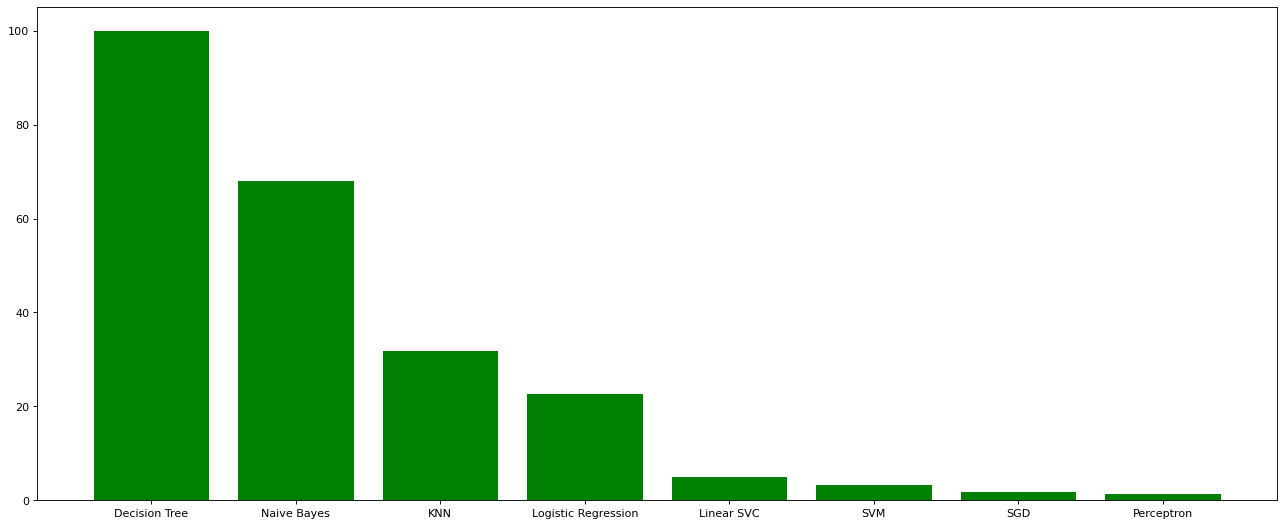

In [41]:
plt.figure(figsize=(20,8),dpi=80)
plt.bar(M_s['Model'],M_s['Score'],color='green')
plt.show()

In [42]:
# 计算对于eeire这个单词的特征值：
print('pos:',"4 4 17 8 4")
print('Mul:',get_multiplicity('eerie'))
print('VN:',get_vowel_num('eeire'))
print('VP',get_vowel_pos('eeire'))
print('FS:',get_sum_letter_frequency('eerie'))
print('FF:',get_first_letter_frequency('eerie'))
print('FB:',get_sum_bigrams_frequency('eerie'))
print('FE:',0)

pos: 4 4 17 8 4
Mul: 27
VN: 4
VP 29
FS: 0.8799776336181555
FF: 0.031101511879049675
FB: 0.007775377969762419
FE: 0


In [43]:
# 最终选用Decision Tree去预估单词'EERIE'的难度
ss = 'eerie'
test = {'Contest number':[620],'Word':['eerie'],'pos_0':['e'],'pos_1':['e'],'pos_2':['r'],'pos_3':['i'],
        'pos_4':['e'],'Mul':[27],'VN':[4],'VP':[29],'FS':[0.8799776336181555],
        'FF':[0.031101511879049675],'FB':[0.007775377969762419],'FE':[0]}

In [44]:
test = pd.DataFrame(test)
print(test['Word'])
test = test.drop(['Word'],axis=1)
encoder = ce.OrdinalEncoder(cols=['Contest number', 'pos_0','pos_1', 'pos_2', 'pos_3', 'pos_4'])
test = encoder.fit_transform(test)
Y_pred = decision_tree.predict(test)
print("标准化标签值：",Y_pred)
Y_pred = lab.inverse_transform(Y_pred)
print("反转后得出难度系数：",Y_pred)

0    eerie
Name: Word, dtype: object
标准化标签值： [162]
反转后得出难度系数： [4.82]


In [45]:
'''
用(1,2,3,4,5,6,X)占比作为标签，删去D,Word字段的影响来训练第二问的模型

'''

D0 = 0
D1 = 0
res = [0,0,0,0,0,0,0,0]

def solve(X,y,i):
    global D0,D1,res
    encoder = ce.OrdinalEncoder(cols=['Contest number', 'pos_0','pos_1', 'pos_2', 'pos_3', 'pos_4'])
    X = encoder.fit_transform(X)
    
    lab = preprocessing.LabelEncoder()
    y = lab.fit_transform(y)

    X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=1027)

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train,Y_train)
    
    Y_pred_decision_tree = decision_tree.predict(X_test)
    acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
    acc_decision_tree
    
    df = pd.DataFrame(test)

    Y_pred = decision_tree.predict(df)
    Y_pred = lab.inverse_transform(Y_pred)
    res[i] += Y_pred[0]
    D0 += 0.01 * Y_pred * i
    D1 += Y_pred
    
train_df = pd.read_csv('data4.csv')
X = train_df.drop(['Date','Word','D','Number of  reported results','Number in hard mode',
                   '1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)',
                  'under_2','under_3','under_4','under_5','under_6','Overall','Hard_rate'],axis=1)


print(test)
mptry = {1:'1 try',2:'2 tries',3:'3 tries',4:'4 tries',5:'5 tries',6:'6 tries',7:'7 or more tries (X)'}
for j in range(1,8):
    for i in range(1000):
        solve(X,train_df[mptry[j]],j)

res = res
new_res = [x/1000 for x in res]
print('尝试次数分布:',new_res,"重估难度系数：",D0/1000,"总占比：",D1/1000)

   Contest number  pos_0  pos_1  pos_2  pos_3  pos_4  Mul  VN  VP        FS  \
0               1      1      1      1      1      1   27   4  29  0.879978   

         FF        FB  FE  
0  0.031102  0.007775   0  
尝试次数分布: [0.0, 0.739, 4.569, 13.0, 36.778, 29.33, 9.0, 1.0] 重估难度系数： [4.03639] 总占比： [94.416]


In [46]:
'''
用(1,2,3,4,5,6,X)占比作为标签，删去D,Word字段的影响来训练第二问的模型

'''

D0 = 0
D1 = 0
res = []

DD = []
DT = []
Res = []
t = [[],[],[],[],[],[],[]]

def solve(X,y,i):
    global D0,D1,res
    encoder = ce.OrdinalEncoder(cols=['Contest number', 'pos_0','pos_1', 'pos_2', 'pos_3', 'pos_4'])
    X = encoder.fit_transform(X)
    
    lab = preprocessing.LabelEncoder()
    y = lab.fit_transform(y)

    X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=1027)

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train,Y_train)
    
    Y_pred_decision_tree = decision_tree.predict(X_test)
    acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
    acc_decision_tree
    
    df = pd.DataFrame(test)

    Y_pred = decision_tree.predict(df)
    Y_pred = lab.inverse_transform(Y_pred)
    res.append(Y_pred[0])
    D0 += (0.01 * Y_pred[0] * i)
    D1 += (Y_pred[0])

train_df = pd.read_csv('data4.csv')
X = train_df.drop(['Date','Word','D','Number of  reported results','Number in hard mode',
                   '1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)',
                  'under_2','under_3','under_4','under_5','under_6','Overall','Hard_rate'],axis=1)

print(test)
mptry = {1:'1 try',2:'2 tries',3:'3 tries',4:'4 tries',5:'5 tries',6:'6 tries',7:'7 or more tries (X)'}

# 1000次投针，选取总占比在[97.5,102.5]的点作为实验对象
for i in range(1000):
    D0 = 0
    D1 = 0
    res = []
    for j in range(1,8):
        solve(X,train_df[mptry[j]],j)
    if D1 < 97.5 or D1 > 102.5:
        continue
    DD.append(D0)
    DT.append(D1)
    t[0].append(res[0])
    t[1].append(res[1])
    t[2].append(res[2])
    t[3].append(res[3])
    t[4].append(res[4])
    t[5].append(res[5])
    t[6].append(res[6])
    Res.append(res)
    
vb = pd.DataFrame({
    'Difficulty':DD,
    '1 try':t[0],
    '2 tries':t[1],
    '3 tries':t[2],
    '4 tries':t[3],
    '5 tries':t[4],
    '6 tries':t[5],
    '7 or more tries (X)':t[6],
    'Overall':DT
})

vb.to_csv('PD.csv')

print('尝试次数分布:',Res)
print("重估难度系数：",DD)
print("总占比：",DT)



   Contest number  pos_0  pos_1  pos_2  pos_3  pos_4  Mul  VN  VP        FS  \
0               1      1      1      1      1      1   27   4  29  0.879978   

         FF        FB  FE  
0  0.031102  0.007775   0  
尝试次数分布: [[1, 6, 13, 39, 30, 9, 1], [1, 7, 13, 39, 30, 9, 1], [0, 6, 13, 39, 30, 9, 1], [1, 7, 13, 39, 28, 9, 1], [1, 6, 13, 39, 30, 9, 1], [1, 6, 13, 39, 30, 9, 1], [1, 6, 13, 39, 30, 9, 1], [1, 7, 13, 39, 30, 9, 1], [0, 6, 13, 39, 30, 9, 1], [0, 6, 13, 39, 30, 9, 1], [1, 7, 13, 39, 28, 9, 1], [0, 7, 13, 39, 30, 9, 1], [1, 7, 13, 39, 30, 9, 1], [1, 6, 13, 39, 30, 9, 1], [1, 7, 13, 39, 30, 9, 1], [1, 6, 13, 39, 30, 9, 1], [1, 7, 13, 39, 28, 9, 1], [1, 6, 13, 39, 30, 9, 1], [1, 6, 13, 39, 30, 9, 1], [1, 7, 13, 39, 30, 9, 1], [1, 6, 13, 39, 30, 9, 1], [0, 6, 13, 39, 30, 9, 1], [1, 7, 13, 39, 30, 9, 1], [1, 6, 13, 39, 30, 9, 1], [1, 7, 13, 39, 30, 9, 1], [1, 6, 13, 39, 30, 9, 1], [1, 7, 13, 39, 30, 9, 1], [1, 7, 13, 39, 30, 9, 1], [1, 6, 13, 39, 30, 9, 1], [1, 7, 13, 39, 30, 9, 

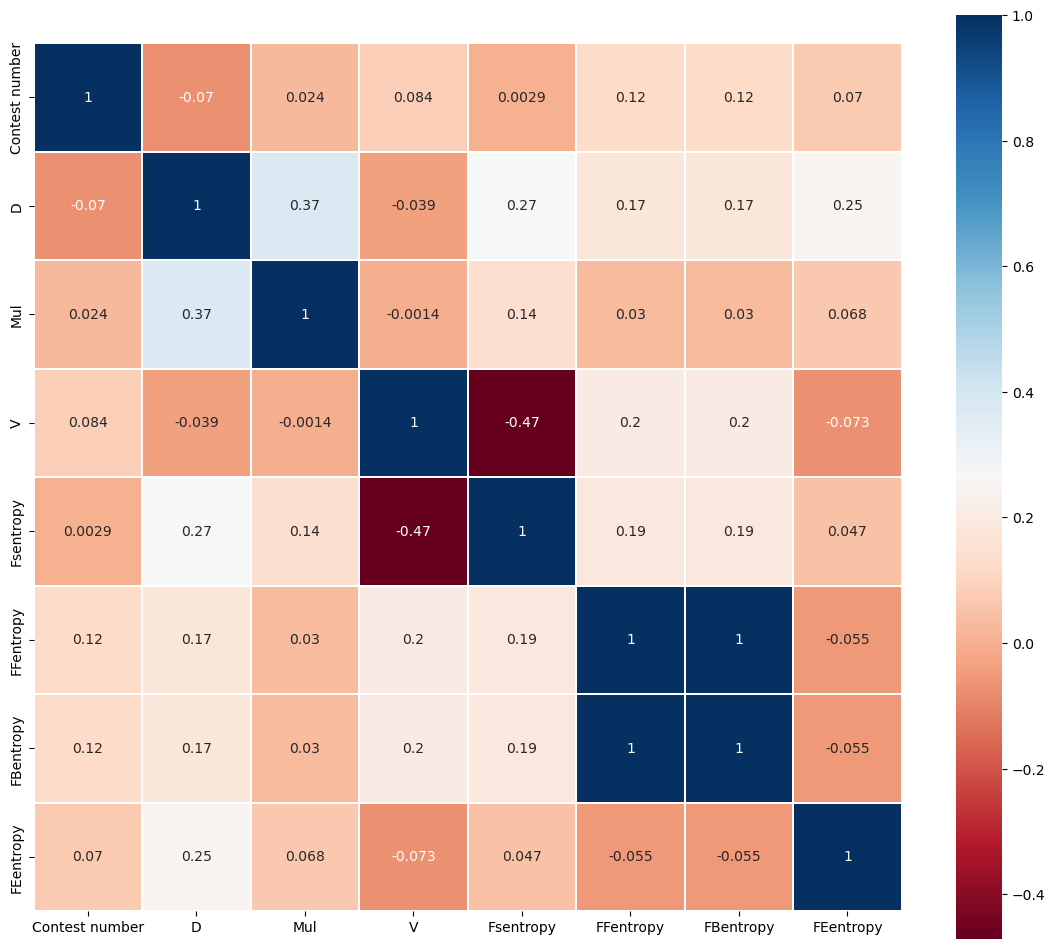

In [47]:
# 计算几个单词的主要特征跟D的热力学图
data = pd.read_csv('word_data2.csv')
df = pd.DataFrame(data)
df = df.drop(['Word','pos_0','pos_1','pos_2','pos_3','pos_4','FS','FF','FB','FE'],axis=1)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,cmap=colormap,linecolor='white',annot=True)
plt.show()

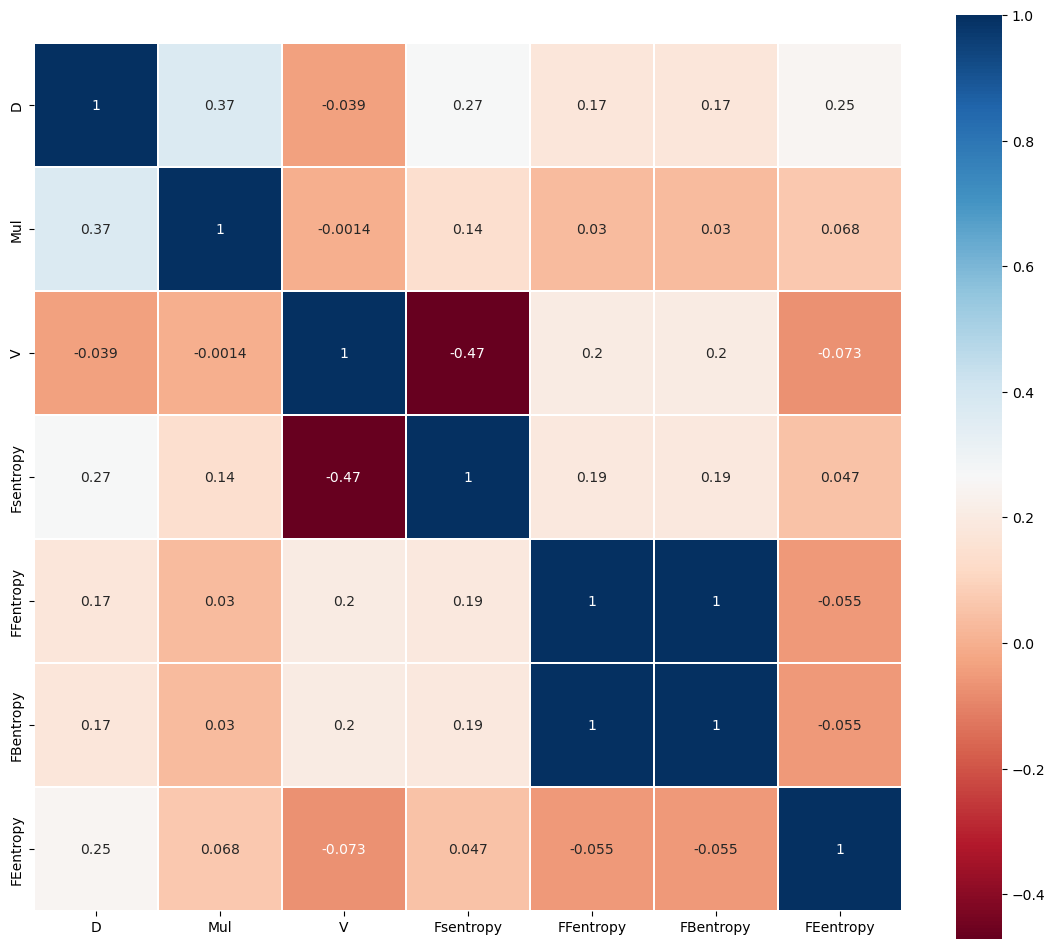

In [48]:
# 计算几个单词的主要特征跟D的热力学图
data = pd.read_csv('word_data2.csv')
df = pd.DataFrame(data)
df = df.drop(['Contest number','Word','pos_0','pos_1','pos_2','pos_3','pos_4','FS','FF','FB','FE'],axis=1)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,cmap=colormap,linecolor='white',annot=True)
plt.show()